In [1]:
import pandas as pd

In [2]:
from scipy.stats import pearsonr

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [6]:
resp_df = pd.read_csv('C:\Air\Provisional_Deaths_Due_to_Respiratory_Illnesses.csv')

In [8]:
print("Respiratory dataset shape:", resp_df.shape)

Respiratory dataset shape: (1107, 9)


In [9]:
print(type(resp_df))
print(resp_df.shape)

<class 'pandas.core.frame.DataFrame'>
(1107, 9)


In [10]:
resp_df = pd.read_csv("C:\Air\Provisional_Deaths_Due_to_Respiratory_Illnesses.csv")

In [11]:
resp_df.head()

,mmwr_week,week,week_start,week_end,season,disease,percent,current_week_ending,row_id
0,202541,41,10/05/2025,10/11/2025,2025-2026,COVID-19,0.0,10/11/2025,202541-COVID-19
1,202541,41,10/05/2025,10/11/2025,2025-2026,Influenza,0.0,10/11/2025,202541-Influenza
2,202541,41,10/05/2025,10/11/2025,2025-2026,RSV,0.0,10/11/2025,202541-RSV
3,202542,42,10/12/2025,10/18/2025,2025-2026,COVID-19,0.0,10/18/2025,202542-COVID-19
4,202542,42,10/12/2025,10/18/2025,2025-2026,Influenza,0.0,10/18/2025,202542-Influenza


In [12]:
resp_df = pd.read_csv("C:\Air\Provisional_Deaths_Due_to_Respiratory_Illnesses.csv", nrows=1000)
resp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mmwr_week            1000 non-null   int64  
 1   week                 1000 non-null   int64  
 2   week_start           1000 non-null   object 
 3   week_end             1000 non-null   object 
 4   season               1000 non-null   object 
 5   disease              1000 non-null   object 
 6   percent              1000 non-null   float64
 7   current_week_ending  1000 non-null   object 
 8   row_id               1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB


In [13]:
resp_df.describe()

,mmwr_week,week,percent
count,1000.000000,1000.00000,1000.000000
mean,202170.877000,27.27700,0.016650
std,185.686584,15.38112,0.053327
min,201840.000000,1.00000,0.000000
25%,202019.000000,14.00000,0.000000
50%,202149.000000,28.00000,0.000000
75%,202328.250000,41.00000,0.000000
max,202543.000000,53.00000,0.450000


In [14]:
# Count missing (NaN) values per column
resp_df.isnull().sum()


mmwr_week              0
week                   0
week_start             0
week_end               0
season                 0
disease                0
percent                0
current_week_ending    0
row_id                 0
dtype: int64

In [15]:
# Show missing value percentages
missing_percent = (resp_df.isnull().sum() / len(resp_df)) * 100
print(missing_percent)


mmwr_week              0.0
week                   0.0
week_start             0.0
week_end               0.0
season                 0.0
disease                0.0
percent                0.0
current_week_ending    0.0
row_id                 0.0
dtype: float64


In [16]:
resp_df.isnull().sum()[resp_df.isnull().sum() > 0]


Series([], dtype: int64)

In [17]:
resp_df = resp_df.dropna(axis=1, how='all')

In [18]:
# Step 2: Check how severe the missing data is
print("\n---- Missing Value Percentage ----")
print((resp_df.isnull().sum() / len(resp_df) * 100).round(2))


---- Missing Value Percentage ----
mmwr_week              0.0
week                   0.0
week_start             0.0
week_end               0.0
season                 0.0
disease                0.0
percent                0.0
current_week_ending    0.0
row_id                 0.0
dtype: float64


In [20]:
print(resp_df.dtypes)
print(resp_df['disease'].unique())


mmwr_week                int64
week                     int64
week_start              object
week_end                object
season                  object
disease                 object
percent                float64
current_week_ending     object
row_id                  object
dtype: object
['COVID-19' 'Influenza' 'RSV']


In [21]:
# Fix for text column
if 'disease' in resp_df.columns:
    resp_df['disease'] = resp_df['disease'].fillna(resp_df['disease'].mode()[0])
    print("Filled missing values in 'disease' with the most frequent category.")


Filled missing values in 'disease' with the most frequent category.


In [22]:
# Example: Convert numeric columns stored as strings
numeric_columns = ['disease']  # adjust as per your dataset
for col in numeric_columns:
    if col in resp_df.columns:
        resp_df[col] = pd.to_numeric(resp_df[col], errors='coerce')
        print(f"Converted '{col}' to numeric type.")

Converted 'disease' to numeric type.


In [23]:
# --- Identify Duplicates ---
duplicate_count = resp_df.duplicated().sum()
print(f"\n---- Duplicate Rows Found: {duplicate_count} ----")


---- Duplicate Rows Found: 0 ----


In [25]:
# --- Remove Duplicates ---
if duplicate_count > 0:
    resp_df = resp_df.drop_duplicates()
    print("Duplicate rows removed successfully.")

In [26]:
# --- Verify ---
print(f"Remaining rows after cleanup: {resp_df.shape[0]}")

Remaining rows after cleanup: 1000


In [27]:
import seaborn as sns

In [28]:
# --- Select numeric columns only ---
numeric_cols = resp_df.select_dtypes(include=['float64', 'int64']).columns

In [30]:
print(resp_df['disease'].describe())
print(resp_df['disease'].unique())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: disease, dtype: float64
[nan]


In [31]:
resp_df['disease'] = pd.to_numeric(resp_df['disease'], errors='coerce')
print(resp_df['disease'].isna().sum())


1000


In [32]:
resp_df['disease'] = resp_df['disease'].astype('category').cat.codes


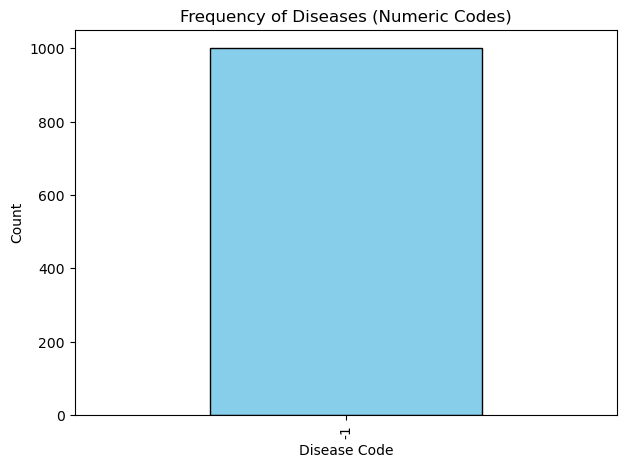

In [33]:
plt.figure(figsize=(7,5))
resp_df['disease'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Diseases (Numeric Codes)')
plt.xlabel('Disease Code')
plt.ylabel('Count')
plt.show()
